In [2]:
import ugradio
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.time import Time
import astropy.table as Table
from datetime import datetime
from datetime import timedelta
import time
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['mathtext.fontset'], plt.rcParams['font.family'] = 'stix', 'STIXGeneral'
plt.rcParams.update({'font.size': 17})

In [36]:
volts, times = np.load('Data/1hr_Sun_data.npy')

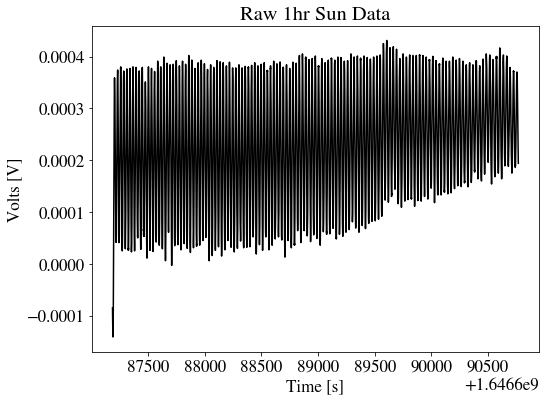

In [51]:
plt.figure(figsize=(8,6))
plt.title('Raw 1hr Sun Data')
plt.ylabel('Volts [V]')
plt.xlabel('Time [s]')
plt.plot(times, volts, 'k')
plt.show()

In [52]:
ν_inter = 10.7 # GHz

freqs = np.fft.fftfreq(len(times), 1/ν_inter)

power = np.abs(np.fft.fft(volts))**2

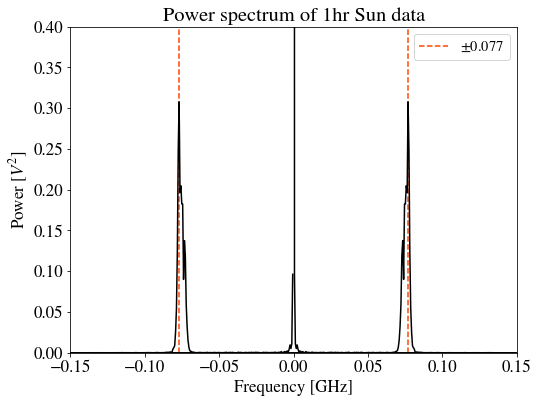

In [122]:
plt.figure(figsize=(8,6))
plt.plot(freqs, power, 'k')
plt.xlim(-0.15, 0.15)
plt.ylim(0, 0.4)
plt.title('Power spectrum of 1hr Sun data')
plt.xlabel('Frequency [GHz]')
plt.ylabel('Power [$V^2$]')

ref_freqs = freqs[20:250]
ref_power = power[20:250]
where_max = np.argwhere(ref_power==np.max(ref_power))[0][0]
plt.vlines(-ref_freqs[where_max], 0, 0.4, color='orangered', linestyle='--', 
           label='$\\pm {0:.3f}$'.format(ref_freqs[where_max]))
plt.vlines(ref_freqs[where_max], 0, 0.4, color='orangered', linestyle='--')

plt.legend(fontsize=14.5)
plt.show()

In [109]:
τ_tot = 1/ref_freqs[where_max]
print('Time delay between the two telescopes = {0:0.3f}'.format(τ_tot[0][0]), 'ns')

Time delay between the two telescopes = 12.999 ns


array([0.07692694])

In [126]:
ugradio.interf.ALT_MAX

175.0